### Step1: Import necessary python packages

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import math

### Step2: Choose and open data file

In [2]:
filename = '../data/serendip6_panoseti_sxp_1_1_20230218_195501.working'
hdu=fits.open(filename)


### Step3: Show PrimaryHDU header

In [3]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BLOCKED =                    T / Blocks of 2880 bytes                           
ORIGIN  = 'SERENDIP VI'        / File was created by the guppi_daq sw           
DATE    = '2023-02-19T03:55:01' / Date (dd/mm//yy) this file was written        
HDRVER  =                   1. / Header version                                 
S6HPCVER= '0.8.0   '           / version of serendip6.so                        
LBGPUVER= '0.8.0   '           / version of libS6GPU.so                         
HASHPVER= '0.1.0   '        

### Step4: Show BinTableHDU header

In [4]:
hdu[1].header

XTENSION= 'BINTABLE'           / FITS binary table                              
BITPIX  =                    8 / Binary data                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    0 / width of table in bytes                        
NAXIS2  =                    0 / Number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    0 / Number of fields per row                       
EXTNAME = 'MROSTATUS'          / name of this binary table extension            
NMATRIX =                    1 / 1 dataset per row                              
COARCHID=                    0 / coarse channel ID                              
TIME    = '*       '           / unix time, decimal seconds                     
SOURCE  = '0406-127'        

### Step5: read data out and plot the data

/tmp/ipykernel_231856/3605782829.py:38: RuntimeWarning: divide by zero encountered in divide
  d = detpow/meanpow


[858.6286   44.40669 120.59773 ...       inf       inf       inf]


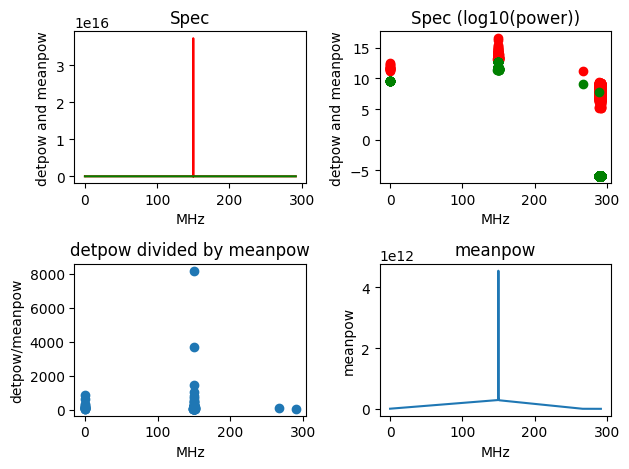

In [6]:
# specify the data is from which BinTableHDU
n = 18
fft_points = 256*1024*1024
fs = 1000

# get data
detpow = hdu[n].data.field('DETPOW')
meanpow = hdu[n].data.field('MEANPOW')
coarchan =hdu[n].data.field('COARCHAN')
finechan = hdu[n].data.field('FINECHAN')

# calculate the freq range
freq = finechan/fft_points*fs
# convert the power to log scale
meanpow_log = []
detpow_log = []
for i in range(len(detpow)):
    meanpow_log.append(math.log(meanpow[i] + 0.000001,10))
    detpow_log.append(math.log(detpow[i],10))

# plot the data
# fig1
plt.subplot(2,2,1)
plt.plot(freq, detpow, color='r')
plt.plot(freq, meanpow, color='g')
plt.title('Spec')
plt.xlabel('MHz')
plt.ylabel('detpow and meanpow')
#fig2
plt.subplot(2,2,2)
plt.scatter(freq, detpow_log, color='r')
plt.scatter(freq, meanpow_log, color='g')
plt.title('Spec (log10(power))')
plt.xlabel('MHz')
plt.ylabel('detpow and meanpow')
#fig3
plt.subplot(2,2,3)
d = detpow/meanpow
print(d)
plt.scatter(freq,d)
plt.title('detpow divided by meanpow')
plt.xlabel('MHz')
plt.ylabel('detpow/meanpow')
#fig4
plt.subplot(2,2,4)
plt.plot(freq,meanpow)
plt.title('meanpow')
plt.xlabel('MHz')
plt.ylabel('meanpow')
# show the figures
plt.tight_layout()
plt.show()
